# Generating time series of noise

It is sometimes useful to generate time series of pure noise with controllable statistics.
The function `generate_noise` of the *TimeSeries* package does precisely that.

In [1]:
import sys
sys.path.append('../TimeSeries/')

import time_series as ts
import numpy as np
import matplotlib.pyplot as plt

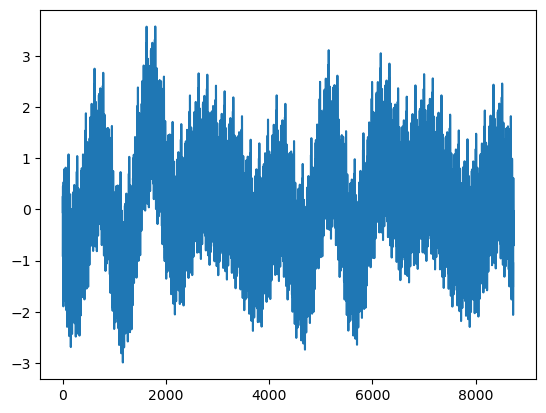

In [2]:
plt.plot(ts.generate_noise()[0])
plt.show()

It takes as first argument the number of daily time steps of the series,
and as second argument the number of times series to be generated:

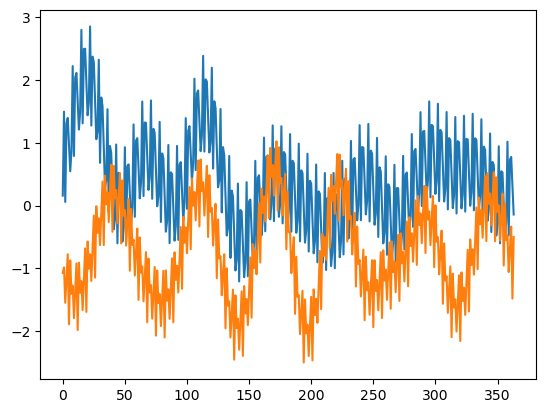

In [3]:
plt.plot(ts.generate_noise(daily_steps=1, count=2).transpose())
plt.show()

## Mathematical description

The time series are created as the sum of $n$ several oscillatory series, using the formula
$$
f(t) = \sqrt{\frac{2}{n}} \sum_{i = 1}^n \hat{A}_i \cos(2\pi \nu_i t + \hat{\theta}_i)
$$
where:
- the amplitudes $\hat{A}_i$ are random variables obeying a normal distribution with zero mean and unit variance,
- the phases $\hat{\theta}_i$ are random variables distributed uniformly in the interval $[0, 2\pi)$,
- the frequencies $\nu_i$ can be specified in the parameters of the function.

The function `generate_noise_with_frequencies` takes directly as arguments the number of time steps per day and a list of frequencies.

Here as an example some series with one time step per day and two frequencies (one with a period of one full year; the other 10 times faster):

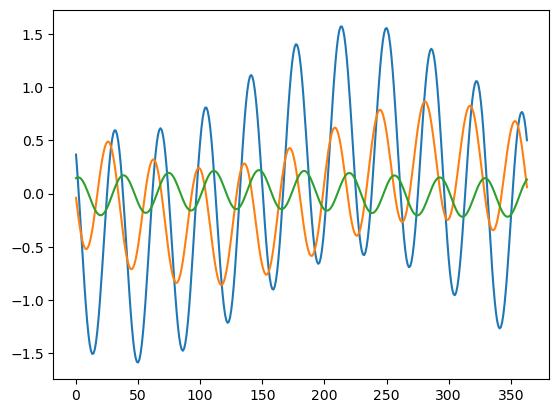

In [4]:
plt.plot(ts.generate_noise_with_frequencies(1, [1/364, 10/364], 3).transpose())
plt.show()

The function `generate_noise` used above is more user-friendly because it takes as input a number of daily, weekly, and yearly frequencies.

For example, some series with one time step per day and just one yearly and one weekly frequency are shown below:

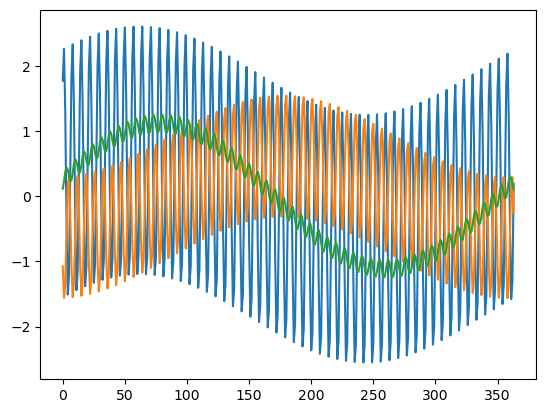

In [5]:
plt.plot(ts.generate_noise(1, 3, 0, 1, 1).transpose())
plt.show()

With sufficiently many distinct frequencies in superposition, the noise series appears to be random (in fact, if all multiples of the base frequency are present, this is white noise).

The default parameters of the function `generate_noise` are:
- 10 daily frequencies
- 6 weekly frequencies (the 7th weekly frequencies would correspond to the first daily mode)
- 10 yearly frequencies

## Statistics

By its definition, the function above has zero mean.
Its normalization is also chosen so that the variance is one.

This can be verified empirically by generating many time series:

In [6]:
noise_series = ts.generate_noise(count=1000)

In [7]:
noise_series.mean()

-1.186186680015553e-15

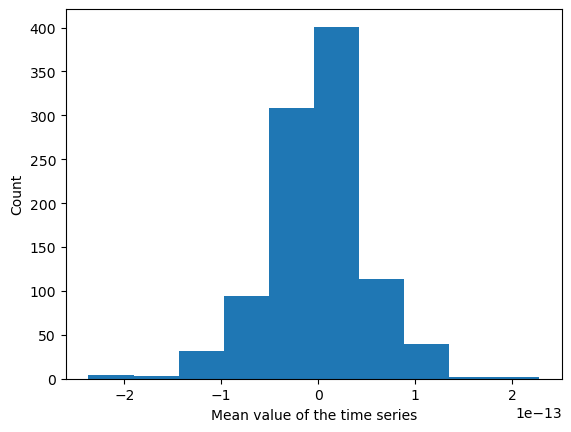

In [8]:
plt.hist(noise_series.mean(axis=1))
plt.xlabel('Mean value of the time series')
plt.ylabel('Count')
plt.show()

In [9]:
noise_series.std(axis=1).mean()

0.9916547001083327

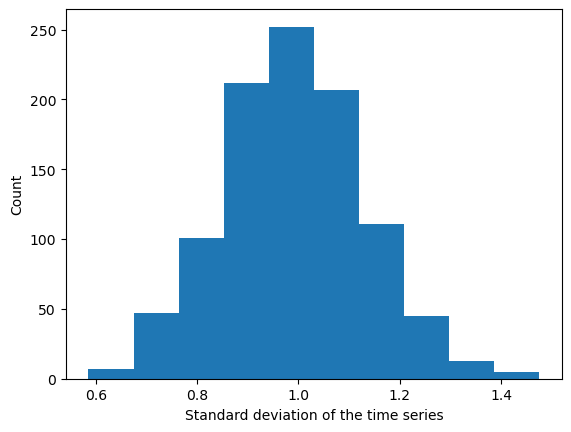

In [10]:
plt.hist(noise_series.std(axis=1))
plt.xlabel('Standard deviation of the time series')
plt.ylabel('Count')
plt.show()